# Linear Regression

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

สุ่มตัวอย่างชุดข้อมูลสำหรับ training

In [2]:
np.random.seed(0)
X = np.random.random(size=(100, 1))
y = 2 * X.squeeze() + 1 + np.random.normal(size=100)

สร้างโมเดล linear regression

In [3]:
est = LinearRegression(fit_intercept=True)
est.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

แสดงผลค่า Coefficient และค่า intercept

In [4]:
print('Model coefficient: %f' % est.coef_)
print('Intercept: %f' % est.intercept_)

Model coefficient: 1.936935
Intercept: 1.222151


สร้างชุดข้อมูลสำหรับทดสอบ

In [5]:
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = est.predict(X_test)

ลองพล็อตกราฟผลลัพธ์

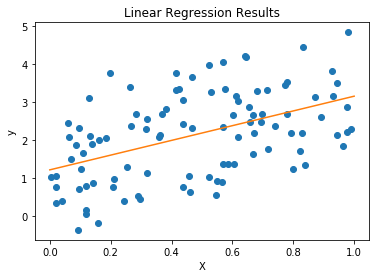

In [6]:
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test)
plt.title('Linear Regression Results')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Student Scores

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(data={
    'hours': [2.5, 5.1, 3.2, 8.5, 3.5, 9.2, 8.9, 6.9, 7.8, 2.7],
    'scores': [21, 47, 27, 75, 30, 88, 95, 76, 86, 25]
})
df

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,9.2,88
6,8.9,95
7,6.9,76
8,7.8,86
9,2.7,25


In [9]:
X = df[['hours']]
y = df.scores

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
X_test

,hours
2,3.2
8,7.8


In [13]:
regressor.predict(X_test)

array([28.97034401, 76.71648873])

In [14]:
X_test = [
    [5]
]
regressor.predict(X_test)

array([47.65361803])

## Breast Cancer Coimbra Data Set

Classification problem

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [16]:
X = df.drop('Classification', axis='columns')
y = df.Classification

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn import neighbors

In [18]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
knn.predict(X_test)

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2])